<a href="https://colab.research.google.com/github/Ekaterina245/movie-analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курочина Екатерина


Проект "Анализ пользовательских предпочтений в фильмах"

In [ ]:
import numpy as np
a = np.array([0.46, 0.38, 0.15, 0.86, 0.02])
b = np.array([0.61, 0.05, 0.38, 0.7, 0.45])
print(list(a+b))

[1.07, 0.43, 0.53, 1.56, 0.47000000000000003]


Описание набора данных:
Содержит более 200 тыс. фильмов, просмотренных более чем 162 тыс. уникальных пользователей, а также рейтинги и жанры

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Импортирование датасета

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Statistika/movies_dataset_1.csv", delimiter=',', index_col='Unnamed: 0')
df

,User_Id,Movie_Name,Rating,Genre
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,1,Underground (1995),5.0,Comedy|Drama|War
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance
...,...,...,...,...
25000090,162541,Ratatouille (2007),4.5,Animation|Children|Drama
25000091,162541,Bee Movie (2007),2.5,Animation|Comedy
25000092,162541,Alvin and the Chipmunks (2007),2.0,Children|Comedy
25000093,162541,"Dark Knight, The (2008)",4.0,Action|Crime|Drama|IMAX


In [ ]:
# Датасет содержит Id пользователя, название просмотренного им фильма, рейтинг и жанр
df.columns

Index(['User_Id', 'Movie_Name', 'Rating', 'Genre'], dtype='object')

#Таблица для определенного пользователя

In [ ]:
# Вывожу фильмы, которые относятся только к 1 пользователю
# Такую таблицу можно вывести для любого из 162 тысяч пользоватея
df_for_1 = df.loc[df['User_Id']. isin([1])]
df_for_1

,User_Id,Movie_Name,Rating,Genre
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,1,Underground (1995),5.0,Comedy|Drama|War
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance
...,...,...,...,...
65,1,Taxi 2 (2000),3.0,Action|Comedy
66,1,2046 (2004),4.5,Drama|Fantasy|Romance|Sci-Fi
67,1,"Very Long Engagement, A (Un long dimanche de f...",3.0,Drama|Mystery|Romance|War
68,1,5x2 (2004),3.5,Drama|Romance


In [ ]:
#Массив из всех оценок 1 пользователя
y=pd.DataFrame(df_for_1['Rating']).values.ravel()
y

array([5. , 3.5, 5. , 5. , 3.5, 4. , 3.5, 3.5, 5. , 4. , 3.5, 4. , 2.5,
       2.5, 2.5, 3.5, 4.5, 4. , 5. , 5. , 4.5, 4. , 5. , 5. , 5. , 3. ,
       5. , 3. , 4. , 4.5, 4. , 0.5, 2. , 5. , 4. , 3. , 4. , 5. , 4.5,
       4. , 3.5, 5. , 3.5, 4. , 4.5, 2. , 3.5, 3.5, 5. , 4. , 2.5, 3. ,
       2.5, 2.5, 4.5, 3.5, 5. , 5. , 4. , 3.5, 1. , 3.5, 4. , 3. , 4. ,
       3. , 4.5, 3. , 3.5, 5. ])

In [ ]:
#Медианное значение рейтинга
np.median(sorted(y))

4.0

In [ ]:
#Среднее значение рейтинга
np.mean(y)

3.8142857142857145

<ipython-input-251-7955c0be4026>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=True, kde=False,


Text(0, 0.5, 'Частота')

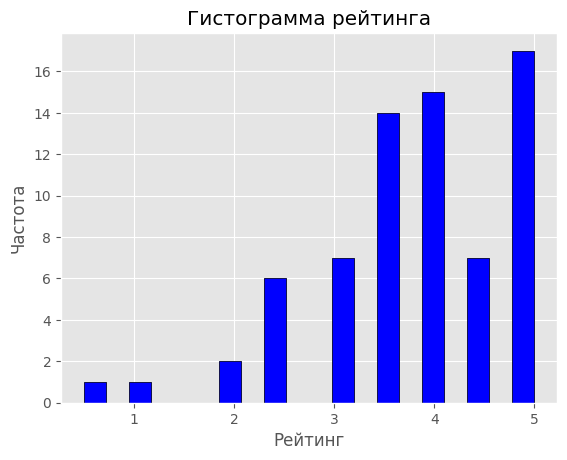

In [ ]:
# Гистограмма частоты оценок
plt.hist(y, color = 'blue', edgecolor = 'black',
         bins = int(100/5))

sns.distplot(y, hist=True, kde=False,
             bins=int(100/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Гистограмма рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')

По данному графику можно судить о том, какие оценки пользователь ставил чаще всего. Напрмер, для первого пользователя преобладает оценка 5, 4 и 3.5, количество оценок ниже 3 сравнительно меньше

Медианное значение рейтинга для первых 100 пользователей

In [ ]:
med = [0]*100

In [ ]:
for i in range (1,100):
  df_for_100 = df.loc[df['User_Id']. isin([i])]
  y=pd.DataFrame(df_for_100['Rating']).values.ravel()
  med[i] = np.median(y)

In [ ]:
len(med)

100

Text(0, 0.5, 'Частота')

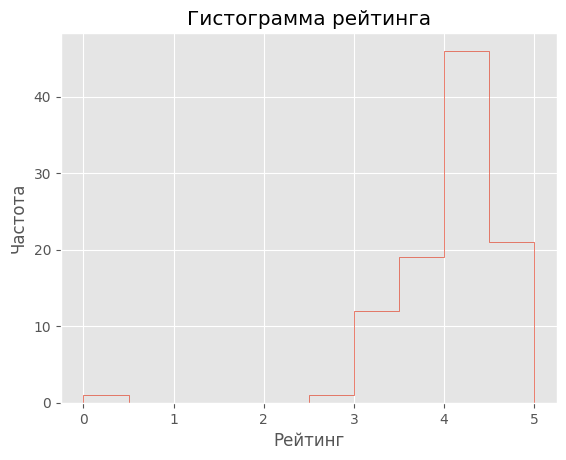

In [ ]:
#Гистограмма медианных значений рейтинга первых 100 пользователей
counts, bins = np.histogram(med)
plt.stairs(counts, bins)

plt.title('Гистограмма рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')

In [ ]:
np.median(sorted(med))

4.0

In [ ]:
np.mean(med)

3.885

Для дальнейшего обучения нейросети необходимо знать соотношение рейтинга и категории фильма, поэтому добавляю столбцы со всеми категориями фильмов и заполняю их 0 и 1 в соответственно.

Разделение жанров фильмов

In [ ]:
df_for_1['Genre'] = df_for_1['Genre'].str.split('|')
dfx = pd.get_dummies(pd.DataFrame(df_for_1['Genre'].tolist()).stack()).sum(level=0)
df_for_1 = pd.concat([df_for_1, dfx], axis=1).drop(columns=['Genre'])
print(df_for_1)

    User_Id                                         Movie_Name  Rating  \
0         1                                Pulp Fiction (1994)     5.0   
1         1   Three Colors: Red (Trois couleurs: Rouge) (1994)     3.5   
2         1   Three Colors: Blue (Trois couleurs: Bleu) (1993)     5.0   
3         1                                 Underground (1995)     5.0   
4         1                         Singin' in the Rain (1952)     3.5   
..      ...                                                ...     ...   
65        1                                      Taxi 2 (2000)     3.0   
66        1                                        2046 (2004)     4.5   
67        1  Very Long Engagement, A (Un long dimanche de f...     3.0   
68        1                                         5x2 (2004)     3.5   
69        1                Look at Me (Comme une image) (2004)     5.0   

    Action  Adventure  Animation  Children  Comedy  Crime  Documentary  ...  \
0        0          0          0

<ipython-input-258-6ef07fe891ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_1['Genre'] = df_for_1['Genre'].str.split('|')
<ipython-input-258-6ef07fe891ad>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfx = pd.get_dummies(pd.DataFrame(df_for_1['Genre'].tolist()).stack()).sum(level=0)


In [ ]:
# Список всех получившихся колонок
df_for_1.columns

Index(['User_Id', 'Movie_Name', 'Rating', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

Сначала необходимо разработать метод, выводящий оценки только по определенной категории

Подсчёт среднего значения для одной категории

In [ ]:
# Массив, где 0 - фильм не в этой категории, 1 - фильм нужной категории
DR = pd.DataFrame(df_for_1['Western']).values.ravel()
DR

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=uint8)

In [ ]:
# Массив всех оценок первого пользователя
Rat = pd.DataFrame(df_for_1['Rating']).values.ravel()
print ("Original list 1 : " + str(Rat))
len(Rat)

Original list 1 : [5.  3.5 5.  5.  3.5 4.  3.5 3.5 5.  4.  3.5 4.  2.5 2.5 2.5 3.5 4.5 4.
 5.  5.  4.5 4.  5.  5.  5.  3.  5.  3.  4.  4.5 4.  0.5 2.  5.  4.  3.
 4.  5.  4.5 4.  3.5 5.  3.5 4.  4.5 2.  3.5 3.5 5.  4.  2.5 3.  2.5 2.5
 4.5 3.5 5.  5.  4.  3.5 1.  3.5 4.  3.  4.  3.  4.5 3.  3.5 5. ]


70

In [ ]:
# Перемножив массив оценок и категории, получаю массив содержащий оценку только по нужной категории
res_list = []
for i in range(0, len(DR)):
    res_list.append(DR[i] * Rat[i])
print ("Resultant list is : " + str(res_list))
len(res_list)

Resultant list is : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


70

In [ ]:
# Искомое среднее значение за категорию
sr_cat = sum(res_list)/sum(DR)
sr_cat

2.5

Подсчет средних значений для всех категорий

In [ ]:
list1 = ['Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']

In [ ]:
# Цикл считает средний рейтинг за каждую категорию фильма
# Список средних оценок
sr_cat_vse = []
# Список количества фильмов в категории
sum_kolva_film = []
# Цикл проходящий по названиям категорий
for column in list1:
  DR = pd.DataFrame(df_for_1[column]).values.ravel()
  res_list = []
  for j in range(0, len(Rat)):
    res_list.append(DR[j] * Rat[j])
  sum_kolva_film.append(sum(DR))
  sr_cat_vse.append(sum(res_list)/sum(DR))

In [ ]:
# Список средних оценок
sr_cat_vse

[4.125,
 3.727272727272727,
 4.0,
 3.8333333333333335,
 3.869565217391304,
 4.0625,
 2.0,
 3.8679245283018866,
 3.6,
 3.5,
 3.5,
 3.7,
 3.5,
 4.166666666666667,
 3.7,
 4.3,
 3.9,
 2.5]

In [ ]:
# Количество фильмов в каждой категории
sum_kolva_film

[4, 11, 2, 3, 23, 8, 1, 53, 5, 1, 1, 5, 4, 18, 5, 5, 5, 1]

In [ ]:
# Вывожу категорию и рейтинг
for i in range(0, len(sr_cat_vse)):
    print (list1[i] + ': ' + str(sr_cat_vse[i]))

Action: 4.125
Adventure: 3.727272727272727
Animation: 4.0
Children: 3.8333333333333335
Comedy: 3.869565217391304
Crime: 4.0625
Documentary: 2.0
Drama: 3.8679245283018866
Fantasy: 3.6
Film-Noir: 3.5
Horror: 3.5
Musical: 3.7
Mystery: 3.5
Romance: 4.166666666666667
Sci-Fi: 3.7
Thriller: 4.3
War: 3.9
Western: 2.5


Для наглядности результата вывожу гистограмму, которая отражает какие фильмы пользователю больше всего нравятся

ValueError: ignored

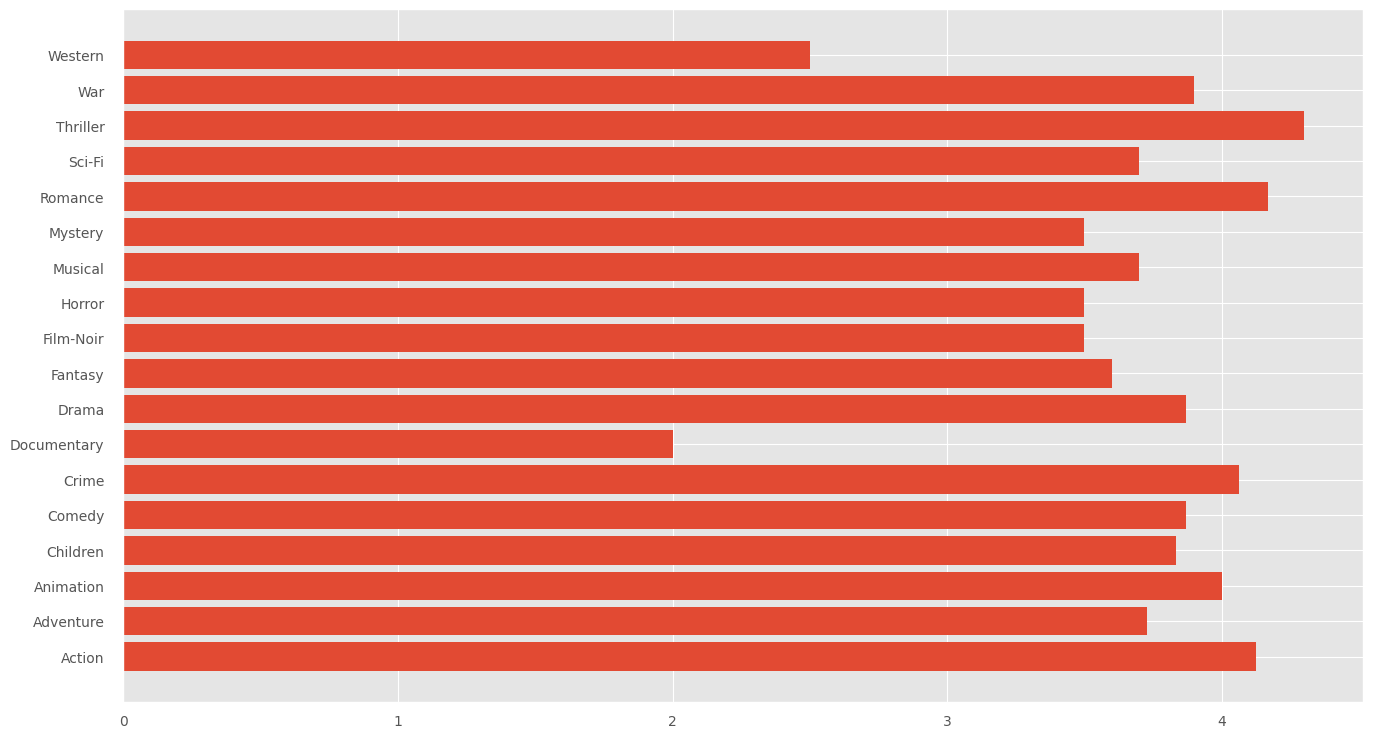

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(list1, sr_cat_vse)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.4,
        alpha = 0.2)


ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')


ax.set_title('Категории фильмов и их средний рейтинг',
             loc ='left', )

# Add Text watermark
#fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         #color ='grey', ha ='right', va ='bottom',
         #alpha = 0.7)

# Show Plot
plt.show()

In [ ]:
# Максимальное значение рейтинга
# Может быть объединить это все в новую таблицу чтобы сразу выводилось
max(sr_cat_vse)

4.3

График, показывающий процентное содержание разных жанров фильмов

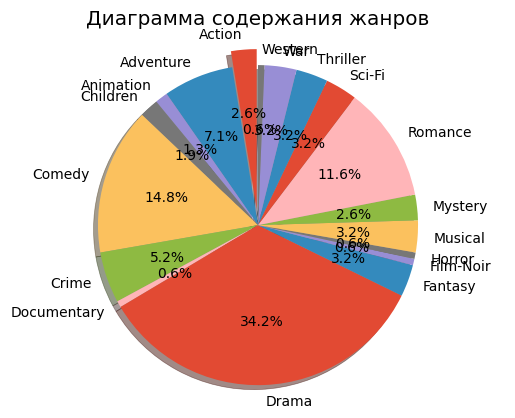

In [ ]:
explode =(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sum_kolva_film, explode=explode, labels=list1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Диаграмма содержания жанров')
plt.show()

Данная диграмма сожержит очень много категорий фильмов, и по ней можно заметить, что некоторые фильмы просматривались всего пару раз. Это вносит запутанность в график, поэтому необходимо удалить фильмы, меющие малое количество просмотров и оставить только те которые преобладают. Например, можно считать жанр, просмотренный больше 6 раз

In [ ]:
sum_kolva_film, print(list1)

['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


([4, 11, 2, 3, 23, 8, 1, 53, 5, 1, 1, 5, 4, 18, 5, 5, 5, 1], None)

In [ ]:
# Лучше добавлять в новый массив, для воспроизводимости результатов
# Жанр фильма
new_name = []
# Количество просмотров
new_kol = []
# Добавить в массива количество > 6 и соответсвующую категорию
for i in range(0, len(sum_kolva_film)):
    if sum_kolva_film[i] > 6:
      new_name.append(list1[i])
      new_kol.append(sum_kolva_film[i])

In [ ]:
# Получившиеся массивы
new_name, new_kol

(['Adventure', 'Comedy', 'Crime', 'Drama', 'Romance'], [11, 23, 8, 53, 18])

In [ ]:
len(new_name)

5

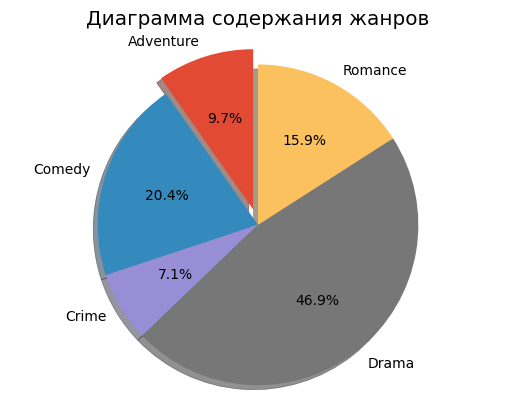

In [ ]:
explode =(0.1, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(new_kol, explode=explode, labels=new_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Диаграмма содержания жанров')

plt.show()


По такому графику уже можжно сказать, что самый популярный жанр это Драма, затем комедия, романтика, менее просматривыемые - приключения и криминал

In [ ]:
list2 = ['Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']

Проанализируем категории, имеющие больший рейтинг для пользователя

In [ ]:
sum_kolva_film2 = []
for column in list1:
  DR = pd.DataFrame(df_for_1[column]).values.ravel()

  sum_kolva_film2.append(sum(DR))

In [ ]:
sr_cat_vse

[4.125,
 3.727272727272727,
 4.0,
 3.8333333333333335,
 3.869565217391304,
 4.0625,
 2.0,
 3.8679245283018866,
 3.6,
 3.5,
 3.5,
 3.7,
 3.5,
 4.166666666666667,
 3.7,
 4.3,
 3.9,
 2.5]

In [ ]:
sum_kolva_film2

[4, 11, 2, 3, 23, 8, 1, 53, 5, 1, 1, 5, 4, 18, 5, 5, 5, 1]

In [ ]:
# Вывод фильмов у которых больший рейтинг
new_name_2 = []
new_kol_2 = []
# Записать в новый массив только те фильмы, у которых рейтинг > 4
for i in range(0, len(sr_cat_vse)):
    if sr_cat_vse[i] > 4:
      new_name_2.append(list2[i])
      new_kol_2.append(sum_kolva_film2[i])

In [ ]:
new_kol_2

[4, 8, 18, 5]

In [ ]:
new_name_2

['Action', 'Crime', 'Romance', 'Thriller']

In [ ]:
len(new_name_2)

4

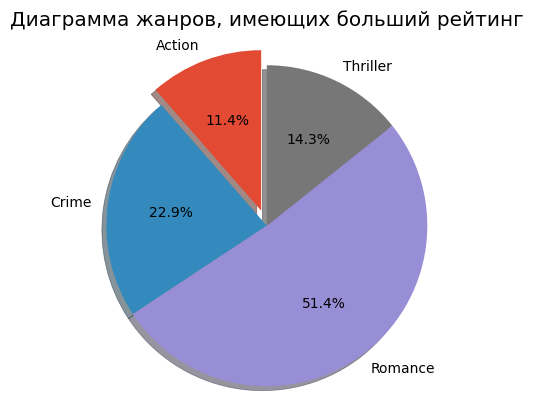

In [ ]:
explode =(0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(new_kol_2, explode=explode, labels=new_name_2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Диаграмма жанров, имеющих больший рейтинг')
plt.show()

In [ ]:
# Вывожу категорию и рейтинг
for i in range(0, len(sr_cat_vse)):
    print (list1[i] + ': ' + str(sr_cat_vse[i]) + '   Kolvo:' + str(sum_kolva_film[i]))

Action: 4.125   Kolvo:4
Adventure: 3.727272727272727   Kolvo:11
Animation: 4.0   Kolvo:2
Children: 3.8333333333333335   Kolvo:3
Comedy: 3.869565217391304   Kolvo:23
Crime: 4.0625   Kolvo:8
Documentary: 2.0   Kolvo:1
Drama: 3.8679245283018866   Kolvo:53
Fantasy: 3.6   Kolvo:5
Film-Noir: 3.5   Kolvo:1
Horror: 3.5   Kolvo:1
Musical: 3.7   Kolvo:5
Mystery: 3.5   Kolvo:4
Romance: 4.166666666666667   Kolvo:18
Sci-Fi: 3.7   Kolvo:5
Thriller: 4.3   Kolvo:5
War: 3.9   Kolvo:5
Western: 2.5   Kolvo:1


# Подготовка данных для дальнейшего анализа

In [ ]:
# Так как ОЗУ ограничено, уменьшаю датасет до 50 пользователей
df_min = df[:18827]
df_min

,User_Id,Movie_Name,Rating,Genre
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,1,Underground (1995),5.0,Comedy|Drama|War
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance
...,...,...,...,...
18822,155,"Reader, The (2008)",3.0,Drama|Romance
18823,155,"Wrestler, The (2008)",3.5,Drama
18824,155,Funny People (2009),4.0,Comedy|Drama
18825,155,Inglourious Basterds (2009),5.0,Action|Drama|War


In [ ]:
# Так же как и для первого пользователя разделяю категории фильмов
df_min['Genre'] = df_min['Genre'].str.split('|')
dfx = pd.get_dummies(pd.DataFrame(df_min['Genre'].tolist()).stack()).sum(level=0)
df_min = pd.concat([df_min, dfx], axis=1).drop(columns=['Genre'])
print(df_min)

       User_Id                                        Movie_Name  Rating  \
0            1                               Pulp Fiction (1994)     5.0   
1            1  Three Colors: Red (Trois couleurs: Rouge) (1994)     3.5   
2            1  Three Colors: Blue (Trois couleurs: Bleu) (1993)     5.0   
3            1                                Underground (1995)     5.0   
4            1                        Singin' in the Rain (1952)     3.5   
...        ...                                               ...     ...   
18822      155                                Reader, The (2008)     3.0   
18823      155                              Wrestler, The (2008)     3.5   
18824      155                               Funny People (2009)     4.0   
18825      155                       Inglourious Basterds (2009)     5.0   
18826      155                              Hangover, The (2009)     4.5   

       (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
0         

<ipython-input-393-430969baa415>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min['Genre'] = df_min['Genre'].str.split('|')
<ipython-input-393-430969baa415>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfx = pd.get_dummies(pd.DataFrame(df_min['Genre'].tolist()).stack()).sum(level=0)


In [ ]:
# Для обучения исключаю стобцы рейтинга, названия фильма
X = pd.DataFrame(df_min.drop(['Rating', 'Movie_Name', '(no genres listed)'], axis=1))
X

,User_Id,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18822,155,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
18823,155,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
18824,155,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
18825,155,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y = pd.DataFrame(df_min['Rating']).values.ravel()
y

array([5. , 3.5, 5. , ..., 4. , 5. , 4.5])

In [ ]:
#подключение модели логистической регрессии из библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
from sys import last_type
# Список, хранящий номера пользователей
lst = df_min.User_Id.unique()
lst

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155])

In [ ]:
kp = len(lst)

In [ ]:
# Массивы для среднего рейтинга по категориям
med2 = []
res_list_2 = []
sr_sum = []
sr_sum_A = []
sr_sum_An  = []
sr_sum_Ch = []
sr_sum_Co = []
sr_sum_Cr = []
sr_sum_Do = []
sr_sum_Dr = []
sr_sum_Fa = []
sr_sum_FN = []
sr_sum_Ho = []
sr_sum_Mu = []
sr_sum_My = []
sr_sum_Ro = []
sr_sum_SF = []
sr_sum_Th = []
sr_sum_Wa = []
sr_sum_We = []

In [ ]:
# В массив sr_sum будут записываться средние значение рейтинга одной категории для разных пользоателей
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Action']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum.append(sr_sum3)
len(sr_sum)

<ipython-input-400-90401c808bb5>:9: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)


155

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Adventure']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_A.append(sr_sum3)
len(sr_sum_A)

155

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Animation']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_An.append(sr_sum3)
#len(sr_sum_An)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Children']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Ch.append(sr_sum3)
len(sr_sum_Ch)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Comedy']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Co.append(sr_sum3)
len(sr_sum_Co)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Crime']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Cr.append(sr_sum3)
len(sr_sum_Cr)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Documentary']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Do.append(sr_sum3)
len(sr_sum_Do)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Drama']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Dr.append(sr_sum3)
len(sr_sum_Dr)

155

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Fantasy']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Fa.append(sr_sum3)
len(sr_sum_Fa)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Film-Noir']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_FN.append(sr_sum3)
len(sr_sum_FN)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Horror']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Ho.append(sr_sum3)
len(sr_sum_Ho)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Musical']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Mu.append(sr_sum3)
len(sr_sum_Mu)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Mystery']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_My.append(sr_sum3)
len(sr_sum_My)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Romance']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Ro.append(sr_sum3)
len(sr_sum_Ro)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Sci-Fi']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_SF.append(sr_sum3)
len(sr_sum_SF)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Thriller']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Th.append(sr_sum3)
len(sr_sum_Th)

155

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['War']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Wa.append(sr_sum3)
len(sr_sum_Wa)

In [ ]:
for i in range (1,kp+1):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Western']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_We.append(sr_sum3)
len(sr_sum_We)

СВОДНАЯ ТАБЛИЦА СРЕДНЕГО ЗНАЧЕНИЯ РЕЙТИНГА ПО КАТЕГОРИИ ДЛЯ КАЖДОГО ПОЛЬЗОВАТЕЛЯ

In [ ]:
df_new = pd.DataFrame(list(zip(sr_sum, sr_sum_A, sr_sum_An, sr_sum_Ch, sr_sum_Co, sr_sum_Cr,
                               sr_sum_Do, sr_sum_Dr, sr_sum_Fa, sr_sum_FN, sr_sum_Ho,
                               sr_sum_Mu, sr_sum_My, sr_sum_Ro, sr_sum_SF, sr_sum_Th,
                               sr_sum_Wa, sr_sum_We)),
                      columns =  ['Action', 'Adventure','Animation',
                                  'Children','Comedy', 'Crime', 'Documentary', 'Drama',
                                  'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                  'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                                  'War', 'Western'])
df_new

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4.125000,3.727273,4.000000,3.833333,3.869565,4.062500,2.000000,3.867925,3.600000,3.5,3.500000,3.700000,3.500000,4.166667,3.700000,4.300000,3.900000,2.500000
1,3.696970,3.906667,3.617647,3.660000,3.317460,3.138889,NaN,3.571429,3.982759,NaN,4.000000,3.272727,3.687500,3.161765,4.017857,3.833333,3.433333,2.500000
2,3.640719,3.689394,3.980000,3.708333,3.454545,3.886364,3.166667,3.890086,3.737179,4.3,3.544444,3.583333,3.891667,3.533333,3.696429,3.692469,3.692308,3.750000
3,3.186207,3.074561,3.467742,3.214286,3.611111,3.972973,4.100000,3.744898,2.833333,NaN,3.150000,3.642857,3.805556,3.450000,3.164706,3.544643,3.333333,2.833333
4,3.722222,3.857143,3.750000,3.333333,3.571429,4.142857,NaN,3.822222,3.500000,NaN,4.666667,3.714286,4.714286,3.550000,4.090909,4.000000,4.500000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,4.179487,3.892857,3.416667,3.100000,3.416667,4.384615,1.000000,4.225000,3.350000,4.0,3.300000,NaN,4.222222,3.100000,4.224138,4.111111,5.000000,NaN
151,3.736842,3.666667,5.000000,3.000000,3.000000,3.440000,1.000000,3.301887,3.333333,NaN,2.571429,NaN,3.142857,2.642857,3.125000,3.468750,4.000000,2.000000
152,4.868421,4.678571,5.000000,NaN,5.000000,5.000000,NaN,5.000000,5.000000,5.0,5.000000,NaN,5.000000,5.000000,4.800000,5.000000,5.000000,NaN
153,2.484848,2.767857,3.200000,2.642857,2.678571,3.450000,NaN,3.260870,2.777778,NaN,3.750000,2.000000,3.600000,2.750000,2.619048,3.026316,0.500000,2.500000


In [ ]:
# Некоторые категории были не просмотрены пользователем, поэтому заменю NaN нулями
df_new = df_new.fillna(0)
df_new

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4.125000,3.727273,4.000000,3.833333,3.869565,4.062500,2.000000,3.867925,3.600000,3.5,3.500000,3.700000,3.500000,4.166667,3.700000,4.300000,3.900000,2.500000
1,3.696970,3.906667,3.617647,3.660000,3.317460,3.138889,0.000000,3.571429,3.982759,0.0,4.000000,3.272727,3.687500,3.161765,4.017857,3.833333,3.433333,2.500000
2,3.640719,3.689394,3.980000,3.708333,3.454545,3.886364,3.166667,3.890086,3.737179,4.3,3.544444,3.583333,3.891667,3.533333,3.696429,3.692469,3.692308,3.750000
3,3.186207,3.074561,3.467742,3.214286,3.611111,3.972973,4.100000,3.744898,2.833333,0.0,3.150000,3.642857,3.805556,3.450000,3.164706,3.544643,3.333333,2.833333
4,3.722222,3.857143,3.750000,3.333333,3.571429,4.142857,0.000000,3.822222,3.500000,0.0,4.666667,3.714286,4.714286,3.550000,4.090909,4.000000,4.500000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,4.179487,3.892857,3.416667,3.100000,3.416667,4.384615,1.000000,4.225000,3.350000,4.0,3.300000,0.000000,4.222222,3.100000,4.224138,4.111111,5.000000,0.000000
151,3.736842,3.666667,5.000000,3.000000,3.000000,3.440000,1.000000,3.301887,3.333333,0.0,2.571429,0.000000,3.142857,2.642857,3.125000,3.468750,4.000000,2.000000
152,4.868421,4.678571,5.000000,0.000000,5.000000,5.000000,0.000000,5.000000,5.000000,5.0,5.000000,0.000000,5.000000,5.000000,4.800000,5.000000,5.000000,0.000000
153,2.484848,2.767857,3.200000,2.642857,2.678571,3.450000,0.000000,3.260870,2.777778,0.0,3.750000,2.000000,3.600000,2.750000,2.619048,3.026316,0.500000,2.500000


In [ ]:
# Вывод параметров полученной таблицы для проверки на корректность введенных данных
df_new.describe()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,3.624146,3.670340,3.297568,3.142683,3.623761,3.849756,1.597767,3.835910,3.525755,1.346411,2.938712,2.648850,3.528188,3.633701,3.471338,3.727650,3.734422,2.503401
std,0.644681,0.599403,1.431794,1.328318,0.643576,0.634783,1.989047,0.490131,0.923444,1.903010,1.472490,1.721456,1.143614,0.706633,0.887426,0.506389,1.119593,1.766335
min,0.000000,1.555556,0.000000,0.000000,0.000000,0.000000,0.000000,1.406250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.375000,0.000000,0.000000
25%,3.243750,3.271610,3.000000,3.000000,3.327957,3.500000,0.000000,3.558646,3.250000,0.000000,2.902256,0.000000,3.250000,3.333333,3.101667,3.362782,3.500000,0.000000
50%,3.663462,3.666667,3.617647,3.434783,3.624277,3.861111,0.000000,3.823529,3.563291,0.000000,3.333333,3.277778,3.750000,3.666667,3.583333,3.684211,4.000000,3.000000
75%,4.033144,4.045455,4.011905,4.000000,4.000000,4.275463,3.934211,4.169872,4.033333,3.621429,4.000000,4.000000,4.180108,4.037767,4.032866,4.125000,4.363971,4.000000
max,4.868421,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: >

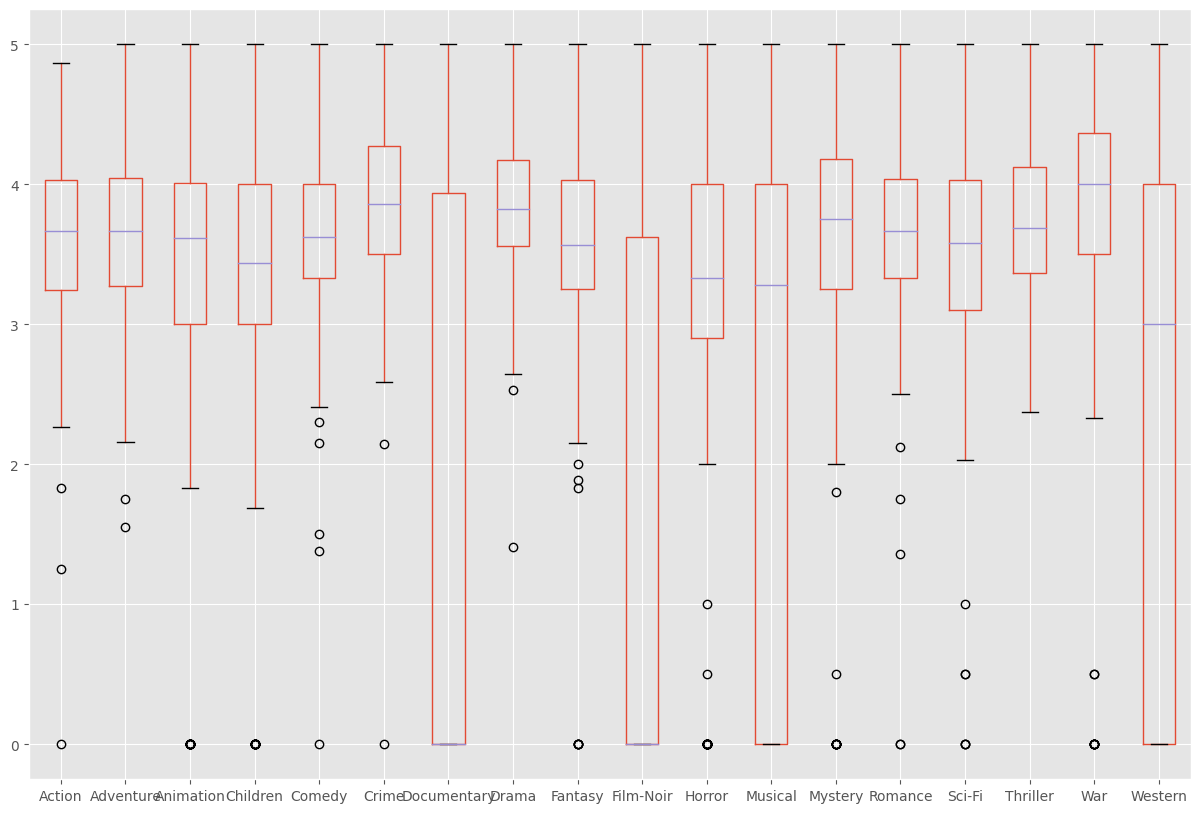

In [ ]:
# График разброса полученных значений
df_new.boxplot(figsize=(15,10))

In [ ]:
# Стандартизирование значений
standard_scaler = StandardScaler()
standard_df = pd.DataFrame(data = standard_scaler.fit_transform(df_new), index = df_new.index, columns = df_new.columns)
standard_df

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.779421,0.095290,0.492186,0.521629,0.383173,0.336230,0.202879,0.065531,0.080661,1.135344,0.382419,0.612596,-0.024728,0.756678,0.258505,1.133922,0.148370,-0.001932
1,0.113327,0.395548,0.224276,0.390715,-0.477478,-1.123488,-0.805887,-0.541362,0.496495,-0.709810,0.723080,0.363587,0.139758,-0.670030,0.617844,0.209377,-0.269799,-0.001932
2,0.025790,0.031891,0.478172,0.427220,-0.263782,0.057856,0.791326,0.110893,0.229695,1.557093,0.412700,0.544604,0.318864,-0.142496,0.254467,-0.069700,-0.037738,0.708042
3,-0.681514,-0.997176,0.119239,0.054079,-0.019719,0.194737,1.262084,-0.186290,-0.752256,-0.709810,0.143956,0.579294,0.243322,-0.260809,-0.346649,-0.362568,-0.359406,0.187395
4,0.152624,0.312658,0.317014,0.143993,-0.081578,0.463230,-0.805887,-0.028017,-0.027980,-0.709810,1.177295,0.620922,1.040511,-0.118834,0.700430,0.539571,0.686016,0.282058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.864213,0.372434,0.083451,-0.032237,-0.322830,0.845316,-0.301504,0.796423,-0.190942,1.398937,0.246154,-1.543714,0.608845,-0.757721,0.851046,0.759701,1.134055,-1.421879
151,0.175376,-0.006149,1.192875,-0.107765,-0.972352,-0.647598,-0.301504,-1.093083,-0.209049,-0.709810,-0.250238,-1.543714,-0.338033,-1.406749,-0.391537,-0.512925,0.237978,-0.285921
152,1.936320,1.687512,1.192875,-2.373581,2.145357,1.817899,-0.805887,2.382759,1.601639,1.926124,1.404403,-1.543714,1.291155,1.939801,1.502063,2.520740,1.134055,-1.421879
153,-1.772956,-1.510518,-0.068365,-0.377505,-1.473413,-0.631794,-0.805887,-1.177041,-0.812612,-0.709810,0.552749,-0.378141,0.062998,-1.254633,-0.963520,-1.389462,-2.898290,-0.001932


<Axes: >

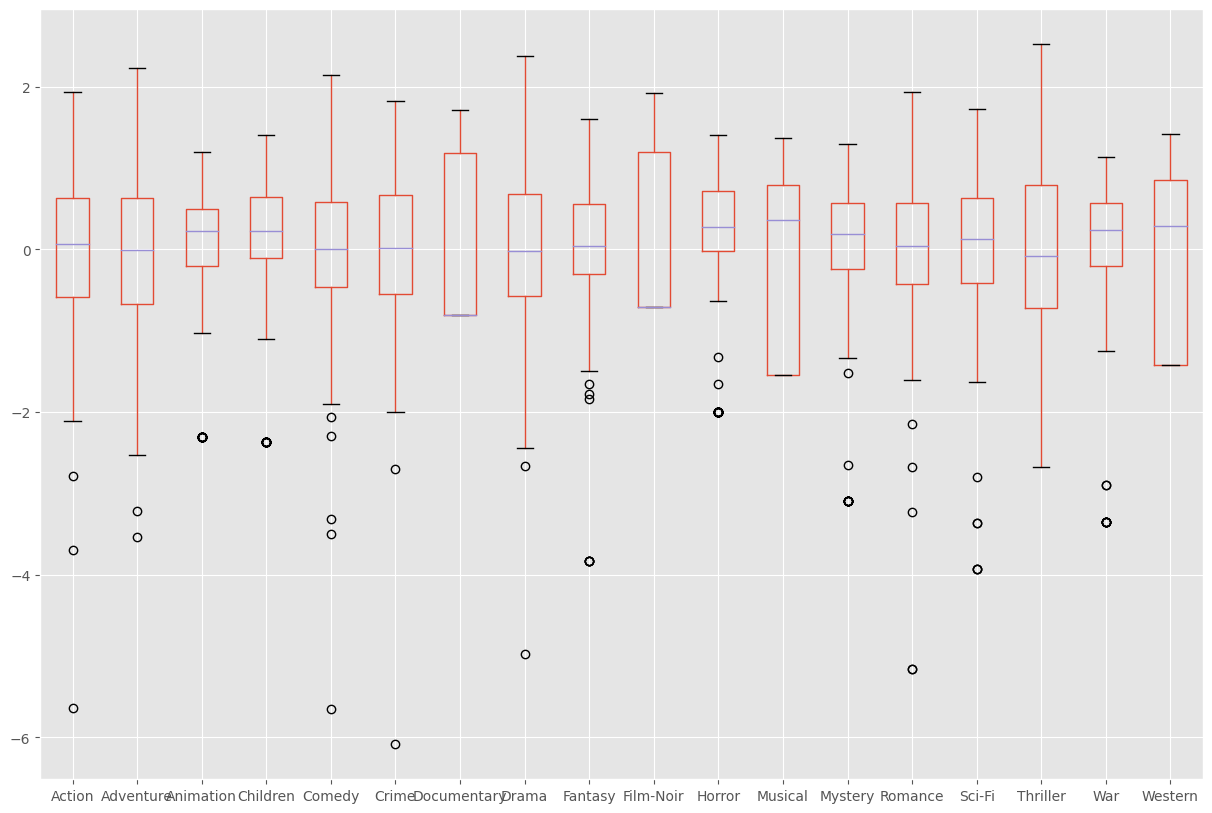

In [ ]:
standard_df.boxplot(figsize=(15,10))

#Постановка задачи и построение модели

Наша задача — выяснить, могут ли предложенные данные быть разбиты каким-то образом на группы (кластеризованы), для того чтобы в дальнейшем нового пользователя ппричислять к какому-либо класстеру и рекомендовать непросмотренные фильмы

Для проведения кластеризации будет использовать метод k-means. Попытаемся определить адекватное число кластеров (изучим диапазон от 1 до 10).

In [ ]:
final_df = df_new.copy()

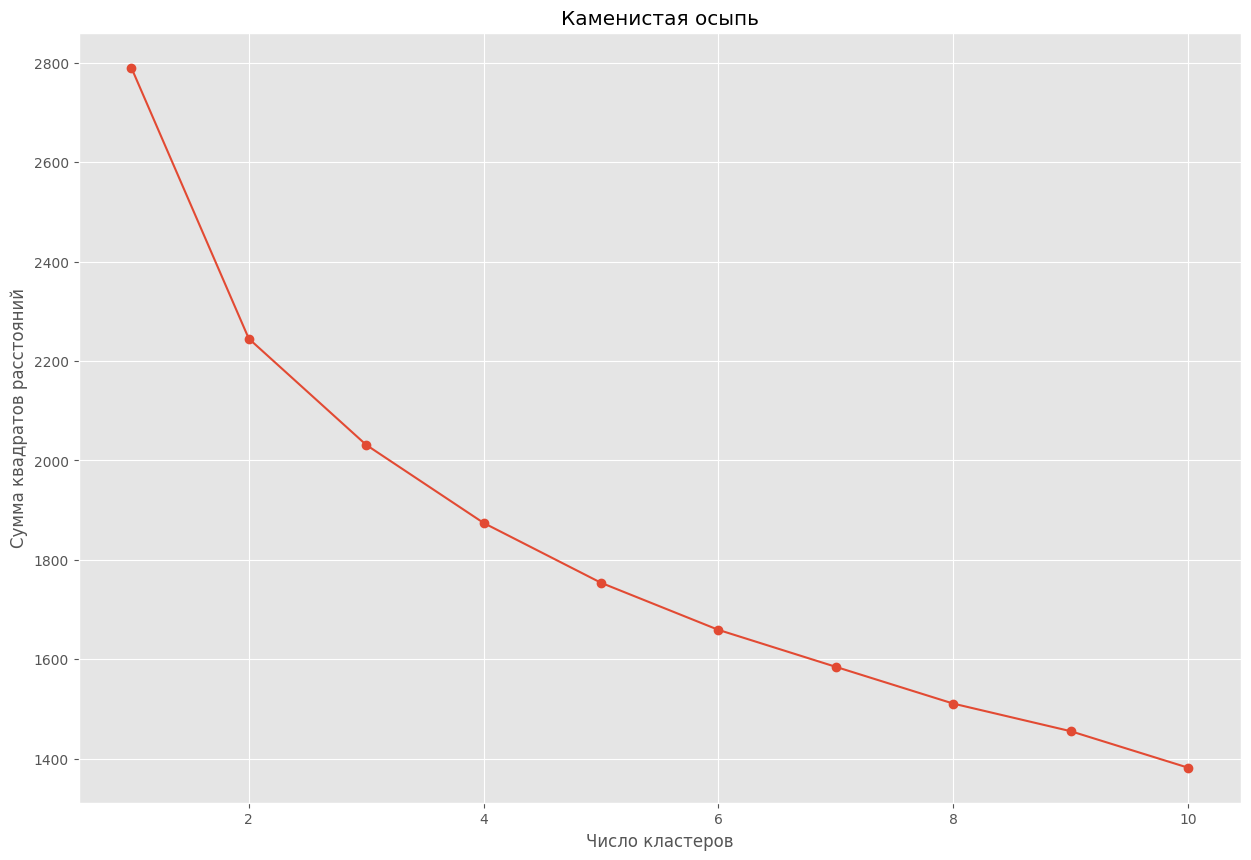

In [ ]:
K = range(1, 11)
models = [KMeans(n_clusters = k, random_state = 111, n_init = 100, max_iter = 10000).fit(standard_df) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(15,10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

Наибольший разлом графика заметен в диапазоне от 3 до 6 класстеров, ппоэтому будем исследовать его

In [ ]:
for i in range(3,7):
  model = KMeans(n_clusters = i, random_state = 111, n_init = 100, max_iter = 10000)
  model.fit(standard_df)

  final_df[f'{i}_clusters'] = model.labels_

  print(final_df.groupby(f'{i}_clusters')[['Action', 'Adventure','Animation',
                                  'Children','Comedy', 'Crime', 'Documentary', 'Drama',
                                  'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                  'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                                  'War', 'Western']].mean())

              Action  Adventure  Animation  Children    Comedy     Crime  \
3_clusters                                                                 
0           2.740904   2.882443   2.252438  2.228867  2.812091  3.253376   
1           3.470817   3.524266   3.399626  3.130606  3.491767  3.667296   
2           4.194783   4.193150   3.552811  3.515949  4.134957  4.351993   

            Documentary     Drama   Fantasy  Film-Noir    Horror   Musical  \
3_clusters                                                                   
0              0.448413  3.224589  2.459042   0.744048  2.196825  1.955267   
1              1.789044  3.690080  3.425365   1.438661  2.915187  2.946370   
2              1.761365  4.289689  4.089312   1.443996  3.262074  2.477806   

             Mystery   Romance    Sci-Fi  Thriller       War   Western  
3_clusters                                                              
0           2.861278  3.073087  2.196181  3.152950  2.265287  2.017460  
1        

По результатам кластеризации можно предположить, что разбиения на 4, 5 и 6 кластеров являются наиболее удачными и интерпретируемыми. Более мелкое разбиение размывает четкие границы кластеров. Постараемся предложить интерпретацию для каждого из 2 вариантов.

#Оценка модели и результатов

In [ ]:
final_df.groupby('4_clusters')[['Action', 'Adventure','Animation',
                                  'Children','Comedy', 'Crime', 'Documentary', 'Drama',
                                  'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                  'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                                  'War', 'Western']].mean()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4_clusters,,,,,,,,,,,,,,,,,,
0,3.922686,3.949228,1.350877,1.277193,3.388753,4.143124,0.210526,3.949705,3.110819,0.789474,2.884942,0.421053,3.937009,3.299701,3.891984,3.954703,3.913939,1.043860
1,3.428179,3.488325,3.499578,3.341997,3.513546,3.629449,2.015824,3.686307,3.446578,1.557646,2.807410,3.197117,3.485308,3.548347,3.306025,3.499867,3.768233,3.008881
2,4.203717,4.196220,4.025763,3.855317,4.163444,4.344367,1.980733,4.290769,4.196512,1.608169,3.440623,2.924256,3.759126,4.184274,4.120672,4.235573,4.239602,2.554999
3,2.654735,2.798432,2.726378,2.538046,2.964021,3.182166,0.495614,3.179918,2.612626,0.480263,2.267982,2.161085,2.720485,2.953687,2.096364,3.122076,2.205492,1.949123


При разбиении на четыре кластера, интерпретация такая:

Нулевой кластер — пользователи которые почти за все ставят низкие оценки, но у них преобладают жанры: криминал, драма, и военная тематика.


Первый кластер — любители экшена, приключений и научной фантастики, больше всего не нравятся документальные фильмы.


Второй кластер — любители экшена, драмы, очень схожи с первым кластером, только оценки ниже

Третий кластер - любители триллеров, мистического кино, не смотрят совсем анимационные фильмы, комедии, документальные и музыкальные фильмы

In [ ]:
final_df.groupby('5_clusters')[['Action', 'Adventure','Animation',
                                  'Children','Comedy', 'Crime', 'Documentary', 'Drama',
                                  'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                  'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                                  'War', 'Western']].mean()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5_clusters,,,,,,,,,,,,,,,,,,
0,2.787982,2.907121,2.465060,2.202810,2.839246,3.041442,0.670833,3.217960,2.315328,0.456250,2.006667,2.128030,2.818627,3.067366,2.279205,3.192160,2.178551,1.905833
1,4.198995,4.197596,3.883909,3.694311,4.249470,4.440857,2.847304,4.331273,4.269589,2.311744,3.903187,2.849005,4.205641,4.270052,4.165664,4.285959,4.360909,2.623983
2,3.360096,3.365207,3.327987,3.219953,3.416710,3.662571,2.403992,3.612668,3.368361,2.108801,3.247041,2.828216,3.690727,3.454534,3.273382,3.497294,3.703920,3.129670
3,3.858822,3.959754,4.113721,4.012860,3.798984,3.931762,0.136364,4.008079,3.916409,0.000000,2.058843,3.347358,2.910065,3.847889,3.643571,3.781292,3.906999,2.384289
4,4.007760,4.093844,1.101190,0.864286,3.729479,4.208850,0.285714,4.073574,3.263492,0.535714,2.906349,0.571429,3.800227,3.200027,3.973196,4.011481,4.240346,0.857143


При разбиении на 5 классетров интерпритация следующая:
Нулевой кластер - пользователи, которым нравится преступления, драма и фэнтази, не любят нуар и документальные.


Первый кластер - ставят очень низкие оценки, признают только романтику, терпеть не могут научную фантастику.


Второй кластер - мистика, триллеры и немного криминала с приключениями, не любят детские фильмы, не смотрят анимационные и документальные.


Третий кластер - больше всего любят криминал, также нравится драма, и триллеры, не смотрят вестерны, нуар и документальные.


Четвертый кластер - любители анимационного кино,драмы,  детских и комедийных фильмов, почти как и все не ценят нуар и документальное

In [ ]:
final_df.groupby('6_clusters')[['Action', 'Adventure','Animation',
                                  'Children','Comedy', 'Crime', 'Documentary', 'Drama',
                                  'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                  'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                                  'War', 'Western']].mean()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6_clusters,,,,,,,,,,,,,,,,,,
0,3.804061,3.806821,1.966403,1.510870,3.343849,3.949414,1.032609,3.822371,2.778140,0.652174,2.432126,1.068841,3.853037,3.306567,3.807166,3.887099,3.820418,1.036232
1,3.907141,4.049188,4.266019,4.157617,3.856317,3.793270,0.225000,4.046933,4.034564,0.000000,1.380702,3.434624,2.145060,3.951229,3.606548,3.681111,3.750000,2.105952
2,4.487585,4.472311,3.281122,3.177381,4.524344,4.645351,1.071429,4.543767,4.452083,1.000000,3.807540,0.285714,4.451474,4.282927,4.435025,4.541683,4.784184,1.857143
3,3.337062,3.318396,3.337491,3.319813,3.413913,3.605033,2.024709,3.592437,3.371664,1.927629,3.269697,2.975008,3.636426,3.437742,3.206489,3.467306,3.748023,3.113665
4,2.624693,2.766548,2.605952,2.473894,2.904995,3.110787,0.553922,3.152782,2.547444,0.360294,2.125490,2.238859,2.614072,2.948238,2.055600,3.085988,2.092413,1.987255
5,3.893378,3.982891,3.943603,3.737060,3.971348,4.213649,2.963673,4.123206,4.073573,2.455832,3.804941,4.013178,4.061810,4.031980,3.861046,4.008613,4.045792,3.419258


Возьмем наибольшее количество кластеров

In [ ]:
#вывод назначенных кластеров пользователям
cluster = model.labels_.tolist()
print(cluster)

[5, 3, 5, 3, 5, 5, 1, 3, 5, 0, 4, 3, 3, 2, 5, 2, 0, 3, 3, 5, 5, 1, 5, 5, 3, 0, 1, 2, 4, 1, 4, 5, 0, 3, 0, 3, 2, 3, 5, 5, 3, 0, 3, 2, 3, 5, 0, 0, 1, 5, 1, 4, 1, 0, 0, 0, 5, 5, 3, 3, 1, 5, 1, 1, 0, 3, 3, 1, 5, 3, 2, 3, 3, 4, 3, 5, 4, 5, 4, 4, 4, 3, 3, 3, 3, 5, 2, 1, 3, 1, 3, 5, 5, 3, 3, 1, 5, 5, 3, 0, 3, 5, 3, 2, 4, 2, 3, 0, 5, 5, 2, 4, 3, 3, 0, 0, 1, 3, 4, 5, 3, 4, 4, 3, 3, 2, 2, 0, 0, 4, 1, 3, 3, 0, 2, 3, 0, 1, 3, 1, 1, 5, 1, 3, 4, 3, 3, 5, 0, 0, 0, 3, 2, 4, 5]


In [ ]:
#Добавление к данным колонки номера пользователя и кластера
standard_df.insert(0, "User", lst, True)
standard_df['Cluster'] = cluster
standard_df

,User,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Cluster
0,1,0.779421,0.095290,0.492186,0.521629,0.383173,0.336230,0.202879,0.065531,0.080661,1.135344,0.382419,0.612596,-0.024728,0.756678,0.258505,1.133922,0.148370,-0.001932,5
1,2,0.113327,0.395548,0.224276,0.390715,-0.477478,-1.123488,-0.805887,-0.541362,0.496495,-0.709810,0.723080,0.363587,0.139758,-0.670030,0.617844,0.209377,-0.269799,-0.001932,3
2,3,0.025790,0.031891,0.478172,0.427220,-0.263782,0.057856,0.791326,0.110893,0.229695,1.557093,0.412700,0.544604,0.318864,-0.142496,0.254467,-0.069700,-0.037738,0.708042,5
3,4,-0.681514,-0.997176,0.119239,0.054079,-0.019719,0.194737,1.262084,-0.186290,-0.752256,-0.709810,0.143956,0.579294,0.243322,-0.260809,-0.346649,-0.362568,-0.359406,0.187395,3
4,5,0.152624,0.312658,0.317014,0.143993,-0.081578,0.463230,-0.805887,-0.028017,-0.027980,-0.709810,1.177295,0.620922,1.040511,-0.118834,0.700430,0.539571,0.686016,0.282058,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,0.864213,0.372434,0.083451,-0.032237,-0.322830,0.845316,-0.301504,0.796423,-0.190942,1.398937,0.246154,-1.543714,0.608845,-0.757721,0.851046,0.759701,1.134055,-1.421879,0
151,152,0.175376,-0.006149,1.192875,-0.107765,-0.972352,-0.647598,-0.301504,-1.093083,-0.209049,-0.709810,-0.250238,-1.543714,-0.338033,-1.406749,-0.391537,-0.512925,0.237978,-0.285921,3
152,153,1.936320,1.687512,1.192875,-2.373581,2.145357,1.817899,-0.805887,2.382759,1.601639,1.926124,1.404403,-1.543714,1.291155,1.939801,1.502063,2.520740,1.134055,-1.421879,2
153,154,-1.772956,-1.510518,-0.068365,-0.377505,-1.473413,-0.631794,-0.805887,-1.177041,-0.812612,-0.709810,0.552749,-0.378141,0.062998,-1.254633,-0.963520,-1.389462,-2.898290,-0.001932,4


#Нейроссеть для классификации нового пользователя

Логистическая регрессия для определения к какому кластеру относится новый пользователь

In [ ]:
from sklearn.model_selection import train_test_split
#Разделение по тренировочную и тестовую выборку
X_train , X_test , y_train , y_test = train_test_split(standard_df, y ,
                                                       test_size = 0.2 ,
                                                       random_state = 42)

# Проверка размерности
X_train.shape , X_test.shape , y_train.shape , y_test.shape

AttributeError: ignored

y = pd.DataFrame(standard_df['Cluster'].values.ravel())
y = cluster

In [ ]:
# Обучающая выборка, в которой нет столбца кластер
X = pd.DataFrame(X_train.drop(['Cluster'], axis = 1))
X = pd.DataFrame(X_train.drop(['User'], axis = 1))
X

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Cluster
96,0.423913,0.627842,0.725749,0.539611,0.670012,0.423387,-0.805887,-0.047917,1.058433,-0.709810,0.518683,0.787432,0.633214,0.362303,0.456343,0.869766,-0.030845,0.566047,5
122,-1.116529,-1.223411,0.141842,-0.107765,-0.469496,-1.136850,-0.805887,-1.301634,-0.842790,-0.709810,-0.055575,0.204646,-0.463355,-0.672536,-0.397190,-1.603326,-0.359406,0.424053,4
82,-0.082038,-1.121972,-2.310568,1.025144,0.153487,-0.421067,1.379773,-0.326353,-0.299584,-0.709810,0.382419,-1.543714,-0.024728,0.046803,-0.250224,-0.561078,0.461997,-0.001932,3
109,0.973943,1.304944,0.492186,0.647508,0.976216,1.027676,1.716029,0.601211,1.239501,-0.709810,1.063742,1.370219,0.789866,0.907257,0.126612,1.332039,0.148370,0.850037,5
65,-0.582240,-0.192119,0.185635,0.143993,-0.387782,0.158430,-0.805887,0.070537,0.282423,-0.709810,0.109889,0.593170,-0.353698,-0.118834,-0.744821,0.209377,1.134055,-0.001932,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.660049,-0.838035,0.043745,-0.133367,-0.548415,-0.606346,1.211646,-0.720941,-0.254316,1.311073,0.162881,0.695413,-0.085228,-0.169993,-0.306749,-0.978339,0.122355,0.388554,3
106,-0.387717,-0.452478,0.141842,0.018114,-0.296318,-0.435078,1.145279,-0.570299,-0.027980,1.188062,0.041757,0.620922,-0.331767,-0.325533,-0.532851,-0.320673,-0.180191,0.708042,3
14,0.258601,-0.389713,0.141842,-0.107765,1.044989,1.106698,1.463837,1.535772,0.379425,-0.709810,0.495972,0.787432,-0.901983,0.898652,0.723269,1.214970,0.387324,-1.421879,5
92,-0.330504,0.570783,0.521382,0.667383,0.389406,-0.157660,-0.805887,0.443605,0.794170,-0.709810,0.685229,1.195383,0.139758,0.626534,0.032403,-0.574836,-1.106137,1.418016,5


In [ ]:
#подключение модели логистической регрессии из библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
#обучение модели
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y_train.values.ravel())

In [ ]:
# Данные пользователя, на котором сеть не обучалась(50 пользователь)
NewObject = [0.525726,	0.248831,	0.453285,	0.260882,	0.667456,	1.249408,	1.260466,	1.411356,	0.582249,	1.751143,	-0.409648,	0.968843,	0.775230,	1.297269,	0.201746,	0.683122,	0.679971,	-1.070587]

In [ ]:
# Предсказание кластера для конкретного пользователя
reg.predict([NewObject])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
# Создание тестовой выборки для расчета метрик
X_test = standard_df[20:]
X_test = pd.DataFrame(X_test.drop(['Cluster'], axis = 1))
X_test = pd.DataFrame(X_test.drop(['User'], axis = 1))
X_test

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
20,0.819793,0.857934,0.988507,0.647508,0.135255,0.488887,1.716029,1.259468,1.029843,1.398937,0.723080,1.370219,0.717565,1.496130,0.974492,0.826320,0.429994,1.134026
21,1.674226,1.053884,0.842530,1.025144,0.141115,1.140565,-0.805887,1.245601,0.515226,-0.709810,0.723080,1.078825,-3.095120,0.993302,1.445537,1.420091,0.237978,1.418016
22,0.396269,0.402987,-0.033330,0.553098,0.526546,0.570178,1.463837,0.769223,0.722162,1.926124,0.268865,0.670875,0.669766,0.488148,0.415317,0.415748,0.775624,0.963633
23,0.655633,0.551763,0.725749,0.899265,0.499899,0.764268,-0.805887,0.563306,0.515226,-0.709810,0.268865,1.370219,0.852527,-0.426446,-0.250224,0.269412,0.686016,0.850037
24,-0.133341,-0.404657,0.141842,0.269871,-0.649831,-0.515142,1.211646,-0.346421,-0.209049,-0.709810,0.723080,0.496039,-0.287904,-0.003012,-0.108910,-0.280223,-0.060714,0.282058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.864213,0.372434,0.083451,-0.032237,-0.322830,0.845316,-0.301504,0.796423,-0.190942,1.398937,0.246154,-1.543714,0.608845,-0.757721,0.851046,0.759701,1.134055,-1.421879
151,0.175376,-0.006149,1.192875,-0.107765,-0.972352,-0.647598,-0.301504,-1.093083,-0.209049,-0.709810,-0.250238,-1.543714,-0.338033,-1.406749,-0.391537,-0.512925,0.237978,-0.285921
152,1.936320,1.687512,1.192875,-2.373581,2.145357,1.817899,-0.805887,2.382759,1.601639,1.926124,1.404403,-1.543714,1.291155,1.939801,1.502063,2.520740,1.134055,-1.421879
153,-1.772956,-1.510518,-0.068365,-0.377505,-1.473413,-0.631794,-0.805887,-1.177041,-0.812612,-0.709810,0.552749,-0.378141,0.062998,-1.254633,-0.963520,-1.389462,-2.898290,-0.001932


In [ ]:
y_test = pd.DataFrame(standard_df['Cluster'].values.ravel())
y_test = y_test[20:]

In [ ]:
# Предсказание с помощью обученной модели
Y_pred = reg.predict(X_test)

In [ ]:
Y_pred

array([5, 1, 5, 5, 3, 0, 1, 2, 4, 1, 3, 5, 0, 3, 0, 3, 5, 3, 5, 5, 3, 0,
       3, 2, 5, 5, 0, 0, 1, 5, 0, 0, 1, 0, 5, 0, 5, 5, 3, 3, 1, 5, 1, 1,
       0, 5, 3, 5, 5, 3, 2, 3, 0, 1, 3, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 5,
       5, 1, 3, 1, 5, 5, 1, 3, 3, 1, 5, 5, 3, 0, 3, 5, 3, 5, 0, 5, 3, 0,
       5, 5, 2, 3, 3, 3, 0, 5, 1, 3, 3, 5, 3, 3, 3, 3, 3, 5, 5, 0, 3, 3,
       1, 3, 3, 0, 5, 3, 4, 1, 3, 1, 1, 5, 1, 3, 3, 3, 3, 5, 5, 0, 0, 0,
       2, 3, 5])

# Вычисление метрик

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)

In [ ]:
# Точность модели (доля правильных ответов)
accuracy = accuracy_score(y_test,Y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.741


Точность полученной модели 83%, что достаточно хорошо для 6 классов и 50 пользователей

# Выводы

В данной работе были описаны алгоритмы, при помощи которых можно проанализировать конкретного пользователя: узнать самые просматриваемые жанры и оценки за них. Также расчитаны медианые значения рейтинга для первых 100 пользователей.
Составлена сводна таблица из пользователей и их средней оценки за категорию фильма.
По этим данным произведена кластеризация, чтобы определить на какое количество групп по интересам лучше делить пользователей.
Произведена логистическая регрессия с целью дальнейшей классификации нового пользователя и составления ему рекомендаций.